In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Visualizing Earnings Based On College Majors

describe the data and provide overview. where di the data come from, the time


In [42]:
grads_df = pd.read_excel('C:/Users/Jason Minhas/Jupyter Projects/Visualizing Earnings Based On College Majors/Dataset/visualizing_earnings_based_on_college_majors.xlsx')

# Objective
---
The objective with this dataset is investigate the following:<br>
1) What are the most popular major categories? <br>
2) What is the highest paying major category?<br>
3) What are the top majors for women and men?<br>
4) What's the relationship between salary and unemployment rate?<br>
5) What's the relationship between major and unemployment rate?<br>

In [43]:
grads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

Here's a description of each 

- **Rank** - Rank by median earnings
- **Major_code** - Major code
- **Major** - Major description
- **Major_category** - Category of major
- **Total** - Total number of people with major
- **Sample_size** - Sample size (unweighted) of full-time
- **Men** - Male graduates
- **Women** - Female graduates
- **ShareWomen** - Women as share of total
- **Employed** - Number employed
- **Median** - Median salary of full-time, year-round workers
- **Low_wage_jobs** - Number in low-wage service jobs
- **Full_time** - Number employed 35 hours or more
- **Part_time** - Number employed less than 35 hours

# Examine Dataset
---

First we will examine the dataset. This will allow us to ensure it's integrity and discover any caveats we will need to adjust for when we begin creating our visuals.

In [44]:
# find row with missing datapoints
null_rows = grads_df[grads_df.isnull().any(axis=1)]
null_rows.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


We can see that for the Food Science major the Total, Men, Women and ShareWomen columns are missing values but the rest of the row has values in it. Some of our questions don't interact with the columns that are missing values so we'll leave the Food Science row in the dataset but we'll have to remove it when we incorporate those columns into our analysis.
<br>
<br>
Next we'll take a look at the integrety of our data to ensure that the numbers we're seeing are logical from a top-level view.

In [45]:
grads_df.describe().round(2)

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.00,173.00,172.00,172.00,172.00,172.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00
mean,87.00,3879.82,39370.08,16723.41,22646.67,0.52,356.08,31192.76,26029.31,8832.40,19694.43,2416.33,0.07,40151.45,29501.45,51494.22,12322.64,13284.50,3859.02
std,50.08,1687.75,63483.49,28122.43,41057.33,0.23,618.36,50675.00,42869.66,14648.18,33160.94,4112.80,0.03,11470.18,9166.01,14906.28,21299.87,23789.66,6945.00
min,1.00,1100.00,124.00,119.00,0.00,0.00,2.00,0.00,111.00,0.00,111.00,0.00,0.00,22000.00,18500.00,22000.00,0.00,0.00,0.00
25%,44.00,2403.00,4549.75,2177.50,1778.25,0.34,39.00,3608.00,3154.00,1030.00,2453.00,304.00,0.05,33000.00,24000.00,42000.00,1675.00,1591.00,340.00
50%,87.00,3608.00,15104.00,5434.00,8386.50,0.53,130.00,11797.00,10048.00,3299.00,7413.00,893.00,0.07,36000.00,27000.00,47000.00,4390.00,4595.00,1231.00
75%,130.00,5503.00,38909.75,14631.00,22553.75,0.70,338.00,31433.00,25147.00,9948.00,16891.00,2393.00,0.09,45000.00,33000.00,60000.00,14444.00,11783.00,3466.00
max,173.00,6403.00,393735.00,173809.00,307087.00,0.97,4212.00,307933.00,251540.00,115172.00,199897.00,28169.00,0.18,110000.00,95000.00,125000.00,151643.00,148395.00,48207.00


One item that stands out to me the most is the numeric columns with 0 as its minimum value. For example, the unemployed column has 0 as its minimumm value. This indicates there is at least one major that has 0 unemployed which I find hard to believe. Lets take a look at which row or rows have 0 as it's unemployment value. 

In [46]:
# find rows with 0 in unemployement column
zero_unemployed = grads_df[grads_df['Unemployed'] == 0]
zero_unemployed.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
52,53,4005,MATHEMATICS AND COMPUTER SCIENCE,609.0,500.0,109.0,Computers & Mathematics,0.178982,7,559,...,0,391,0,0.0,42000,30000,78000,452,67,25
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,0,111,0,0.0,40000,40000,40000,0,0,0
83,84,3602,BOTANY,1329.0,626.0,703.0,Biology & Life Science,0.528969,9,1010,...,169,740,0,0.0,37000,26000,40000,677,184,56
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.305109,4,613,...,185,383,0,0.0,35000,18500,44000,355,144,0
120,121,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,280.0,524.0,Education,0.651741,5,703,...,0,504,0,0.0,34000,29000,35000,346,206,111


What I see in common with these rows is that they all have low sample sizes. To verify if rows with 0 as its unemployed truly do have smaller sample sizes lets compare the average sample size for rows that are greater then or equal to 1 in the unemployed to row that are equal to 0 in the unemployed column.

In [47]:
# describe rows with 0 in unemployement column
zero_unemployed['Sample_size'].describe().round(2)

count    5.00
mean     5.80
std      2.17
min      4.00
25%      4.00
50%      5.00
75%      7.00
max      9.00
Name: Sample_size, dtype: float64

In [48]:
# find and describe rows that are greater then or equal to 1 in unemployment column
one_or_greater_unemployed = grads_df[grads_df['Unemployed'] >= 1]
one_or_greater_unemployed['Sample_size'].describe().round(2)

count     168.00
mean      366.51
std       624.53
min         2.00
25%        45.75
50%       142.00
75%       342.00
max      4212.00
Name: Sample_size, dtype: float64

Rows with 0 as a value in the Unemployed column average a sample size about 6 whereas rows greater then or equal to 1 as a value in the Unemployed column average about 366. 
<br>
<br>
It seems like a small sample size is leading to inaccuracies in the data. Here's a [link](https://sciencing.com/determine-size-quantitative-research-study-8072459.html) to an article that explains the importance of sample sizes. To summerize, a small sample size can increases the margin of error and reduce the power of the analysis. This would render our findings meaningless depending on the analysis and visuals we create. This is something we'll keep in mind for later.

# Cleaning
---

Before we analyze and create visuals for our data we must clean our imported dataset. We can see above there are rows columns above that are missing rows

# Analyze and Create Visuals
---



array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

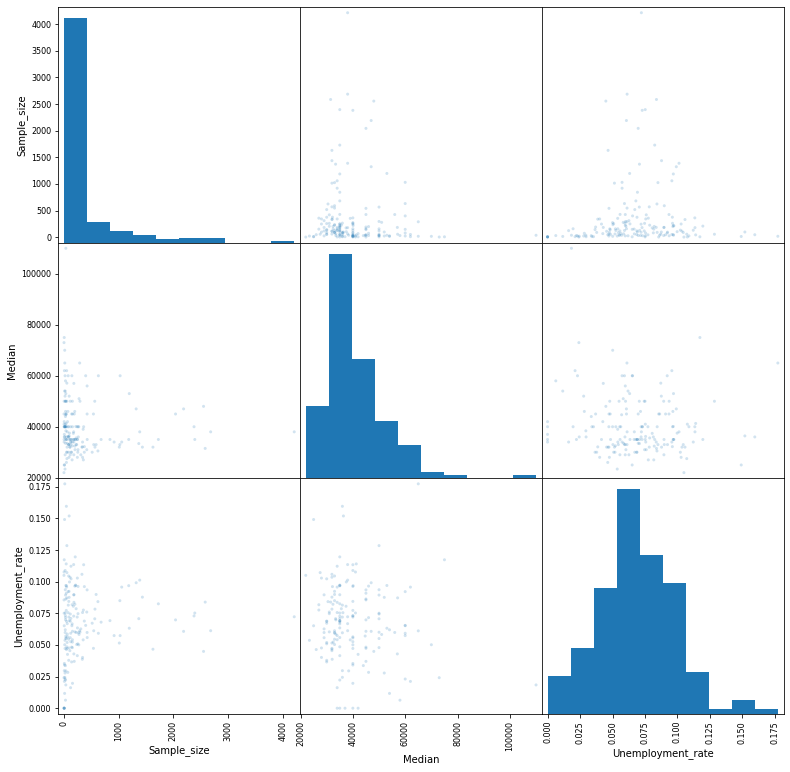

In [49]:
from pandas.plotting import scatter_matrix

scatter_matrix_df = grads_df[['Sample_size', 'Median', 'Unemployment_rate']]

pd.plotting.scatter_matrix(scatter_matrix_df, alpha=0.2, figsize=(13,13))

# Bar plot


<AxesSubplot:xlabel='Major'>

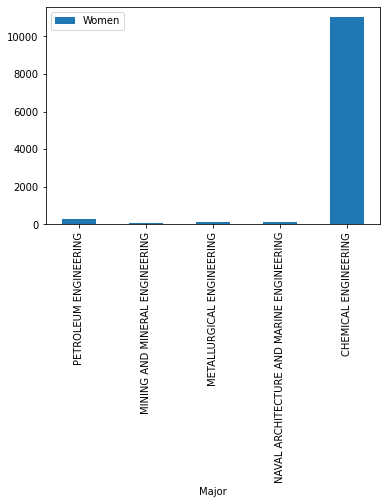

In [50]:
grads_df[:5].plot.bar(x='Major', y='Women')